<a href="https://colab.research.google.com/github/karaage0703/pytorch-example/blob/master/pytorch_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Data Preprocessing

PyTorchのデータ前処理の挙動確認

Data Augmentation（データ水増し）に関しても、何をしているか画像で確認する

## サンプルデータダウンロード

データセットとして、ジャンケンの手の形の画像データをダウンロードして、不要なファイルを削除します。

In [1]:
!git clone https://github.com/karaage0703/janken_dataset datasets
!rm -rf /content/datasets/.git
!rm /content/datasets/LICENSE

Cloning into 'datasets'...
remote: Enumerating objects: 210, done.
remote: Total 210 (delta 0), reused 0 (delta 0), pack-reused 210
Receiving objects: 100% (210/210), 4.60 MiB | 19.53 MiB/s, done.
Resolving deltas: 100% (3/3), done.


データの中身を確認します。

In [2]:
!ls datasets

choki  gu  pa


In [3]:
!ls datasets/choki

choki_01.jpg  IMG_0783.JPG  IMG_0797.JPG  IMG_0811.JPG	IMG_0876.JPG
IMG_0770.JPG  IMG_0784.JPG  IMG_0798.JPG  IMG_0812.JPG	IMG_0877.JPG
IMG_0771.JPG  IMG_0785.JPG  IMG_0799.JPG  IMG_0813.JPG	IMG_0878.JPG
IMG_0772.JPG  IMG_0786.JPG  IMG_0800.JPG  IMG_0814.JPG	IMG_0879.JPG
IMG_0773.JPG  IMG_0787.JPG  IMG_0801.JPG  IMG_0815.JPG	IMG_0880.JPG
IMG_0774.JPG  IMG_0788.JPG  IMG_0802.JPG  IMG_0816.JPG	IMG_0881.JPG
IMG_0775.JPG  IMG_0789.JPG  IMG_0803.JPG  IMG_0817.JPG	IMG_0882.JPG
IMG_0776.JPG  IMG_0790.JPG  IMG_0804.JPG  IMG_0818.JPG	IMG_0883.JPG
IMG_0777.JPG  IMG_0791.JPG  IMG_0805.JPG  IMG_0870.JPG	IMG_0884.JPG
IMG_0778.JPG  IMG_0792.JPG  IMG_0806.JPG  IMG_0871.JPG	IMG_0885.JPG
IMG_0779.JPG  IMG_0793.JPG  IMG_0807.JPG  IMG_0872.JPG
IMG_0780.JPG  IMG_0794.JPG  IMG_0808.JPG  IMG_0873.JPG
IMG_0781.JPG  IMG_0795.JPG  IMG_0809.JPG  IMG_0874.JPG
IMG_0782.JPG  IMG_0796.JPG  IMG_0810.JPG  IMG_0875.JPG


画像を表示します。

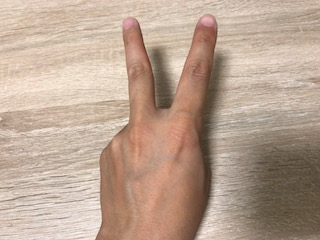

In [4]:
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
display_jpeg(IPImage('datasets/choki/choki_01.jpg'))

In [0]:
dataset_root_dir = '/content/datasets'

## datasetの扱い

必要なライブラリをインポートします

PyTorchとtorchvision というデータの前処理や可視化をしてくれる便利なライブラリをインポートします。

画像の可視化に、matplotlibとPillowをインポートします。

In [0]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import PIL

まずは、ImageFolderを使って、フォルダの画像を dataset として読み込みます。

In [0]:
dataset = datasets.ImageFolder(root=dataset_root_dir)

datasetの中身を確認します。167個のデータとして読み込まれたのが分かります。

dataset[0]〜[166]までにPillow形式の画像データとラベルのインデックスが格納されています。

In [8]:
print(dataset)
x, y = dataset[0]
print(x)
print(y)

Dataset ImageFolder
    Number of datapoints: 167
    Root location: /content/datasets
<PIL.Image.Image image mode=RGB size=320x240 at 0x7F11DBCFF748>
0


具体的な中身は`__getitem__`で確認できます。

最後の数字はラベルを示しています。データセットのディレクトリの名前順になります。具体的には以下です。
```
0: choki
1: gu
2: pa
```

In [9]:
print(dataset.__getitem__(0))
print(dataset.__getitem__(100))
print(dataset.__getitem__(150))

(<PIL.Image.Image image mode=RGB size=320x240 at 0x7F11DB6DC160>, 0)
(<PIL.Image.Image image mode=RGB size=320x240 at 0x7F11DB6DCF28>, 1)
(<PIL.Image.Image image mode=RGB size=320x240 at 0x7F12297D2C50>, 2)


matplotlibで中身を確認してみましょう。

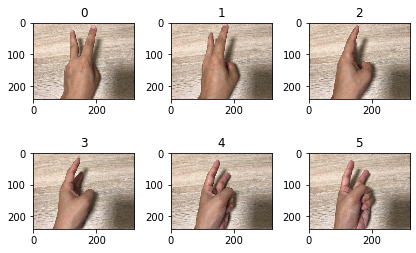

In [10]:
image_numb = 6 # 3の倍数を指定してください
for i in range(0, image_numb):
  ax = plt.subplot(image_numb / 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(dataset[i][0])

## torchvision.transformsの中身（Data Processing / Data Augmentation）

torchvision.transformsで行なっている画像処理の中身を一つ一つ確認していきます。

https://pytorch.org/docs/stable/torchvision/transforms.html

### RandomResizeCrop

その名の通り、ランダムにリサイズしてクロップします。

In [0]:
IMAGE_SIZE = 64
data_transform = transforms.Compose([
    transforms.RandomResizedCrop(IMAGE_SIZE, scale=(0.08, 1.0), interpolation=PIL.Image.BILINEAR),
    transforms.CenterCrop(IMAGE_SIZE),
])

dataset_augmentated = datasets.ImageFolder(root=dataset_root_dir, transform=data_transform)

中身を確認します。

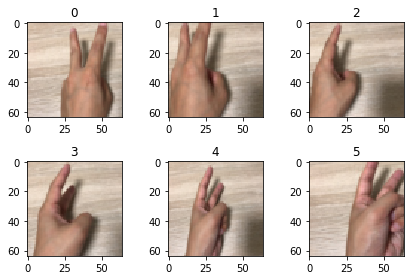

In [12]:
image_numb = 6 # 3の倍数を指定してください
for i in range(0, image_numb):
  ax = plt.subplot(image_numb / 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(dataset_augmentated[i][0])

### Random Horizontal Flip / Vertical Flip

ランダムに左右反転、上下反転をします。

In [0]:
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
])

dataset_augmentated = datasets.ImageFolder(root=dataset_root_dir, transform=data_transform)

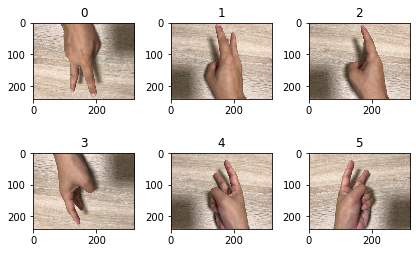

In [14]:
image_numb = 6 # 3の倍数を指定してください
for i in range(0, image_numb):
  ax = plt.subplot(image_numb / 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(dataset_augmentated[i][0])

### Random Erasing

有名なData Augmentation手法のRandom Erasingです（カットアウトのような？）。PyTorchでは、標準実装されています。

In [0]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(),
])

dataset_augmentated = datasets.ImageFolder(root=dataset_root_dir, transform=data_transform)

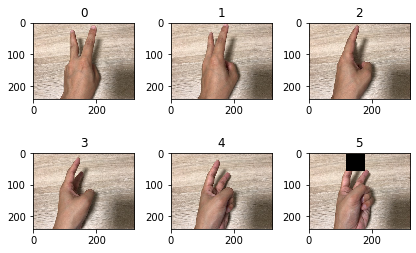

In [16]:
image_numb = 6 # 3の倍数を指定してください
for i in range(0, image_numb):
  ax = plt.subplot(image_numb / 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(dataset_augmentated[i][0].numpy().transpose((1, 2, 0)))

### Normalization

標準化です。

In [0]:
IMAGE_SIZE = 4

data_transform = transforms.Compose([
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
#    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

dataset_augmentated = datasets.ImageFolder(root=dataset_root_dir, transform=data_transform)

In [18]:
print(dataset_augmentated.__getitem__(0))

(tensor([[[0.8588, 0.8471, 0.8000, 0.7765],
         [0.8471, 0.8431, 0.8196, 0.7765],
         [0.8196, 0.8235, 0.7922, 0.7765],
         [0.7961, 0.7765, 0.7725, 0.7451]],

        [[0.6235, 0.6118, 0.5608, 0.5412],
         [0.6118, 0.6078, 0.5804, 0.5373],
         [0.5843, 0.5882, 0.5529, 0.5333],
         [0.5569, 0.5373, 0.5294, 0.5020]],

        [[0.5137, 0.5020, 0.4510, 0.4314],
         [0.5098, 0.5059, 0.4706, 0.4275],
         [0.4902, 0.4941, 0.4431, 0.4353],
         [0.4745, 0.4549, 0.4314, 0.4039]]]), 0)


`transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))` の標準化は、ImageNetのデータセットの学習につかっている前処理らしいです。

https://pytorch.org/docs/master/torchvision/models.html

In [0]:
IMAGE_SIZE = 4

data_transform = transforms.Compose([
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

dataset_augmentated = datasets.ImageFolder(root=dataset_root_dir, transform=data_transform)

In [20]:
print(dataset_augmentated.__getitem__(0))

(tensor([[[ 1.6324,  1.5810,  1.3755,  1.2728],
         [ 1.5810,  1.5639,  1.4612,  1.2728],
         [ 1.4612,  1.4783,  1.3413,  1.2728],
         [ 1.3584,  1.2728,  1.2557,  1.1358]],

        [[ 0.7479,  0.6954,  0.4678,  0.3803],
         [ 0.6954,  0.6779,  0.5553,  0.3627],
         [ 0.5728,  0.5903,  0.4328,  0.3452],
         [ 0.4503,  0.3627,  0.3277,  0.2052]],

        [[ 0.4788,  0.4265,  0.1999,  0.1128],
         [ 0.4614,  0.4439,  0.2871,  0.0953],
         [ 0.3742,  0.3916,  0.1651,  0.1302],
         [ 0.3045,  0.2173,  0.1128, -0.0092]]]), 0)


### CenterCrop

中心部分をクロップ（切り抜き）する

In [0]:
IMAGE_SIZE = 64
data_transform = transforms.Compose([
    transforms.CenterCrop(IMAGE_SIZE),
])

dataset_augmentated = datasets.ImageFolder(root=dataset_root_dir, transform=data_transform)

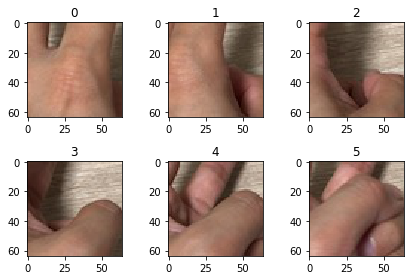

In [22]:
image_numb = 6 # 3の倍数を指定してください
for i in range(0, image_numb):
  ax = plt.subplot(image_numb / 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(dataset_augmentated[i][0])

## albumentations 実装

albumentationsというData Augmentation用のライブラリをPyTorchで手軽に使う方法です。参考サイトは、本記事の最後に記載します。

albumentationsをインストールします。

In [23]:
! pip install albumentations

     |████████████████████████████████| 634kB 3.5MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=72dbfa93ed4285806268244498bbfbc38b81dd923a01f879b4dc4b5cadcab430
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


インポートします。

In [0]:
import albumentations as albu
import numpy as np
from PIL import Image

In [0]:
albu_transforms = albu.Compose([
  albu.RandomRotate90(p=0.5),
  albu.RandomGamma(gamma_limit=(85, 115), p=0.2),
])

def albumentations_transform(image, transform=albu_transforms):    
  if transform:
    image_np = np.array(image)
    augmented = transform(image=image_np)
    image = Image.fromarray(augmented['image'])
  return image

data_transform = transforms.Compose([
  transforms.Lambda(albumentations_transform),
])

dataset_augmentated = datasets.ImageFolder(root=dataset_root_dir, transform=data_transform)

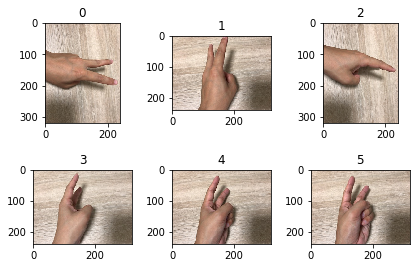

In [26]:
image_numb = 6 # 3の倍数を指定してください
for i in range(0, image_numb):
  ax = plt.subplot(image_numb / 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(dataset_augmentated[i][0])

## torchvision.transforms以外の実装

### Mixup
以下を参考に実装

https://github.com/hongyi-zhang/mixup


まずは普通にデータローダーを作成

In [0]:
IMAGE_SIZE = 64
data_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=dataset_root_dir, transform=data_transform)

train_dataloader = torch.utils.data.DataLoader(dataset,
                                          batch_size=6,
                                          shuffle=True,
                                          num_workers=1)

mixupの実装

In [0]:
import numpy as np

def mixup_data(x, y, alpha=1.0, use_cuda=True):

    '''Compute the mixup data. Return mixed inputs, pairs of targets, and lambda'''
    if alpha > 0.:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.
    batch_size = x.size()[0]
    if use_cuda:
        index = torch.randperm(batch_size).cuda()
    else:
        index = torch.randperm(batch_size)

    mixed_x = lam * x + (1 - lam) * x[index,:]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

In [0]:
(data, target) = iter(train_dataloader).next()
mixed_data, target_a, target_b, lam = mixup_data(data, target, alpha=1.0, use_cuda=torch.cuda.is_available())

中身を確認

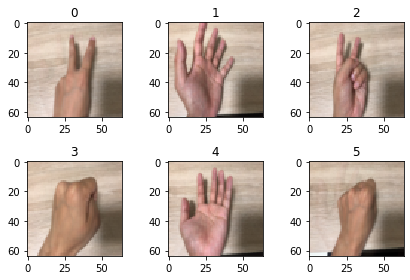

In [30]:
image_numb = 6 # 3の倍数を指定してください
for i in range(0, image_numb):
  ax = plt.subplot(image_numb / 3, 3, i + 1)
  plt.tight_layout()
  ax.set_title(str(i))
  plt.imshow(mixed_data[i].numpy().transpose((1, 2, 0)))

## まとめ

PyTorchでのデータの前処理方法を確認した

# 参考リンク

- https://qiita.com/Takayoshi_Makabe/items/79c8a5ba692aa94043f7
- https://stackoverflow.com/questions/59206422/loading-saved-dataloader-with-lambda-throws-attributeerror-from-pickle